# Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Projection Functions

In [13]:
def project_onto_sphere(point, center, radius):
    vector_from_center = point - center
    norm = np.linalg.norm(vector_from_center)
    
    return center + (vector_from_center / norm) * radius

def project_onto_plane(point, normal, point_on_plane):
    point_to_plane_vector = point - point_on_plane
    projection_length = np.dot(point_to_plane_vector, normal)
    
    return point - projection_length * normal

def project_onto_cylinder(point, radius):
    xy_norm = np.linalg.norm(point[:2])
    
    if xy_norm == 0:
        return np.array([radius, 0, point[2]])
        
    return np.array([point[0] / xy_norm * radius, point[1] / xy_norm * radius, point[2]])

# Main Function

In [14]:
def dykstras_algorithm(initial_point, iterations=1000):
    x = np.array(initial_point, dtype=float)
    z1, z2, z3 = np.zeros(3), np.zeros(3), np.zeros(3)
    center_sphere = np.array([1, 1, 1])
    radius_sphere = 2
    normal_plane = np.array([1, 1, 1]) / np.sqrt(3)
    point_on_plane = np.array([1, 1, 1])
    radius_cylinder = 1

    for _ in range(iterations):
        y1 = project_onto_sphere(x + z1, center_sphere, radius_sphere)
        z1 += x - y1
        x = y1
        
        y2 = project_onto_plane(x + z2, normal_plane, point_on_plane)
        z2 += x - y2
        x = y2

        y3 = project_onto_cylinder(x + z3, radius_cylinder)
        z3 += x - y3
        x = y3

    return x

initial_point = [3, 0, 0]  
result_point = dykstras_algorithm(initial_point)

print("The point in the intersection of the sphere, plane, and cylinder is:", result_point)

The point in the intersection of the sphere, plane, and cylinder is: [0.97437645 0.22492338 1.80070017]


# Visualization

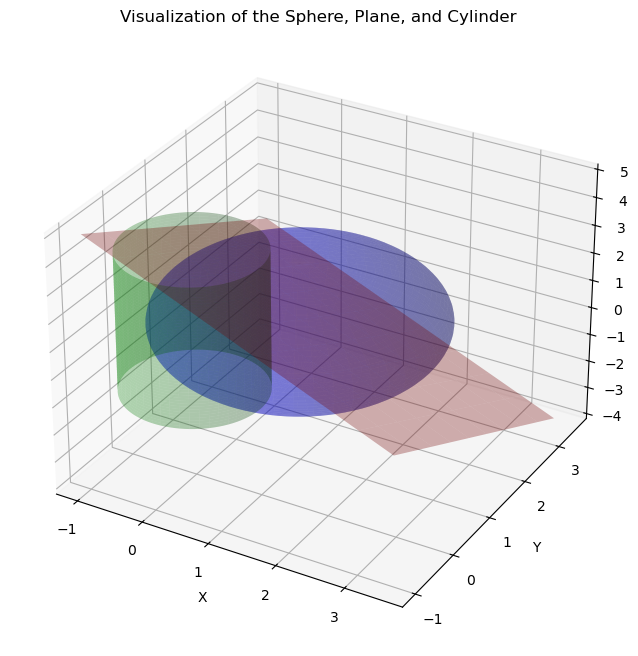

In [17]:
def project_onto_sphere(point, center, radius):
    vector_from_center = point - center
    norm = np.linalg.norm(vector_from_center)
    return center + (vector_from_center / norm) * radius

def project_onto_plane(point, normal, point_on_plane):
    point_to_plane_vector = point - point_on_plane
    projection_length = np.dot(point_to_plane_vector, normal)
    return point - projection_length * normal

def project_onto_cylinder(point, radius):
    xy_norm = np.linalg.norm(point[:2])
    if xy_norm == 0:
        return np.array([radius, 0, point[2]])
    return np.array([point[0] / xy_norm * radius, point[1] / xy_norm * radius, point[2]])

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 + 2 * np.outer(np.cos(u), np.sin(v))
y = 1 + 2 * np.outer(np.sin(u), np.sin(v))
z = 1 + 2 * np.outer(np.ones(np.size(u)), np.cos(v))

px, py = np.meshgrid(np.arange(-1, 4, 0.5), np.arange(-1, 4, 0.5))
pz = 3 - px - py

theta = np.linspace(0, 2 * np.pi, 100)
cz = np.linspace(-1, 4, 100)
cx = np.cos(theta)
cy = np.sin(theta)
CX, CZ = np.meshgrid(cx, cz)
CY, _ = np.meshgrid(cy, cz)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, color='b', alpha=0.3, label='Sphere')
ax.plot_surface(px, py, pz, color='r', alpha=0.3, label='Plane')
ax.plot_surface(CX, CY, CZ, color='g', alpha=0.3, label='Cylinder')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of the Sphere, Plane, and Cylinder')

plt.show()